<a href="https://colab.research.google.com/github/surajsrivathsa/ovgu_deeplearning/blob/master/Airlabs_unibas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/airlab-unibas/airlab.git@master


  Cloning https://github.com/airlab-unibas/airlab.git (to revision master) to /tmp/pip-req-build-_fy53h22
  Running command git clone -q https://github.com/airlab-unibas/airlab.git /tmp/pip-req-build-_fy53h22
     |████████████████████████████████| 44.9MB 68kB/s 
  Created wheel for airlab: filename=airlab-0.2.1-cp36-none-any.whl size=47234 sha256=ffa52eadb19c1f9f8d55692ff02e3496772d35f95c56584c4ef8930295c3e9a3
  Stored in directory: /tmp/pip-ephem-wheel-cache-jis5679y/wheels/e5/dc/b8/c9bb75800f644977e186411873da68842b20cbc56d9f8962b3
Successfully built airlab


In [ ]:
import airlab as al

In [ ]:
import torch
import sys
import os
import time
import matplotlib.pyplot as plt
from glob import glob
os.chdir("/content/drive/My Drive/Colab Notebooks/image_registration")

In [ ]:
#pip install antspyx

In [ ]:
#import ants
import numpy as np
import nibabel as nb

In [ ]:
import nibabel.processing as nbp

In [ ]:
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

1
Tesla T4


In [ ]:
BASE_IMG_PATH=os.path.join('/content/drive/My Drive/Colab Notebooks/image_registration','')
glob(os.path.join(BASE_IMG_PATH,'T1_ixi','*'))

['/content/drive/My Drive/Colab Notebooks/image_registration/T1_ixi/IXI002-Guys-0828-T1.nii.gz',
 '/content/drive/My Drive/Colab Notebooks/image_registration/T1_ixi/IXI014-HH-1236-T1.nii.gz',
 '/content/drive/My Drive/Colab Notebooks/image_registration/T1_ixi/IXI013-HH-1212-T1.nii.gz',
 '/content/drive/My Drive/Colab Notebooks/image_registration/T1_ixi/IXI012-HH-1211-T1.nii.gz',
 '/content/drive/My Drive/Colab Notebooks/image_registration/T1_ixi/IXI016-Guys-0697-T1.nii.gz',
 '/content/drive/My Drive/Colab Notebooks/image_registration/T1_ixi/IXI015-HH-1258-T1.nii.gz',
 '/content/drive/My Drive/Colab Notebooks/image_registration/T1_ixi/IXI017-Guys-0698-T1.nii.gz',
 '/content/drive/My Drive/Colab Notebooks/image_registration/T1_ixi/IXI019-Guys-0702-T1.nii.gz',
 '/content/drive/My Drive/Colab Notebooks/image_registration/T1_ixi/IXI020-Guys-0700-T1.nii.gz',
 '/content/drive/My Drive/Colab Notebooks/image_registration/T1_ixi/IXI021-Guys-0703-T1.nii.gz',
 '/content/drive/My Drive/Colab Notebo

In [ ]:
# A path to a T1-weighted brain .nii image:
t1_fn = '/content/drive/My Drive/Colab Notebooks/image_registration/T1_ixi/IXI002-Guys-0828-T1.nii.gz'
t2_fn = '/content/drive/My Drive/Colab Notebooks/image_registration/T2_ixi/IXI002-Guys-0828-T2.nii.gz'       
        
"""
img1 = ants.image_read(t1_fn)
img2 = ants.image_read(t2_fn)
print(img2)
img4 = img1.clone()
print(img4.spacing)
img5 = ants.resample_image(img2,(.5, .5, .5),False,1)
print(img5.spacing)
ants.plot(img4)
ants.plot(img5)
"""

'\nimg1 = ants.image_read(t1_fn)\nimg2 = ants.image_read(t2_fn)\nprint(img2)\nimg4 = img1.clone()\nprint(img4.spacing)\nimg5 = ants.resample_image(img2,(.5, .5, .5),False,1)\nprint(img5.spacing)\nants.plot(img4)\nants.plot(img5)\n'

In [ ]:
epi_img_1 = nb.load(t1_fn)
epi_img_2 = nb.load(t2_fn)
epi_img_data_1 = epi_img_1.get_fdata()
epi_img_data_2 = epi_img_2.get_fdata()

In [ ]:
print(epi_img_1.affine)
print(" ============= ============== ===================")
print(epi_img_2.affine)
print(" ============= ============== ===================")
print(nb.aff2axcodes(epi_img_1.affine))
print(" ============= ============== ===================")
print(nb.aff2axcodes(epi_img_2.affine))

[[ 0.00000000e+00  0.00000000e+00  1.19999695e+00 -8.86398926e+01]
 [-9.30352330e-01  1.15545668e-01  0.00000000e+00  1.16532005e+02]
 [ 1.15545668e-01  9.30352330e-01 -2.49799545e-16 -1.12113556e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
 ============= ============== ===================
[[-9.37500000e-01 -2.03287907e-19 -7.85041964e-19  1.20759880e+02]
 [-1.36706899e-19  9.31711733e-01 -1.38688713e-01 -1.04171005e+02]
 [-6.07701265e-19  1.04016535e-01  1.24228239e+00 -6.02864990e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
 ============= ============== ===================
('P', 'S', 'R')
 ============= ============== ===================
('L', 'A', 'S')


Resampling image to 111 mm

In [ ]:
resampled_voxel_size = [1,1,1]
epi_img_1 = nb.processing.resample_to_output(epi_img_1,voxel_sizes=resampled_voxel_size)
epi_img_2 = nb.processing.resample_to_output(epi_img_2,voxel_sizes=resampled_voxel_size)

Changing the orientation of the image

In [ ]:
canonical_img_1 = nb.as_closest_canonical(epi_img_1)
print(" ============= ============== ===================")
print(canonical_img_1.affine)
print(" ============= ============== ===================")
print(nb.aff2axcodes(canonical_img_1.affine))
print(" ============= ============== ===================")
canonical_img_2 = nb.as_closest_canonical(epi_img_2)
print(" ============= ============== ===================")
print(canonical_img_2.affine)
print(" ============= ============== ===================")
print(nb.aff2axcodes(canonical_img_2.affine))

 ============= ============== ===================
[[   1.            0.            0.          -88.63989258]
 [   0.            1.            0.         -120.70783889]
 [   0.            0.            1.         -112.11355591]
 [   0.            0.            0.            1.        ]]
 ============= ============== ===================
('R', 'A', 'S')
 ============= ============== ===================
 ============= ============== ===================
[[   1.            0.            0.         -118.30261993]
 [   0.            1.            0.         -122.06184927]
 [   0.            0.            1.          -60.28649902]
 [   0.            0.            0.            1.        ]]
 ============= ============== ===================
('R', 'A', 'S')


In [ ]:
print(canonical_img_1.header.get_data_shape())
print(canonical_img_2.header.get_data_shape())

(180, 268, 268)
(241, 257, 188)


In [ ]:
canonical_img_data_1 = canonical_img_1.get_fdata()
canonical_img_data_2 = canonical_img_2.get_fdata()

In [ ]:
print(canonical_img_data_1.shape)
print(canonical_img_data_2.shape)

(180, 268, 268)
(241, 257, 188)


In [ ]:
epi_img_data_2.shape

(256, 256, 130)

In [ ]:
def show_slices(slices):
  """ Function to display row of image slices """
  fig, axes = plt.subplots(1, len(slices))
  for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

Text(0.5, 0.98, 'Center slices for EPI image')

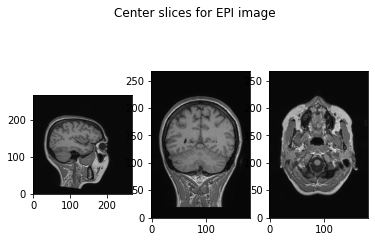

In [ ]:
slice_0 = canonical_img_data_1[50, :, :]
slice_1 = canonical_img_data_1[:, 80, :]
slice_2 = canonical_img_data_1[:, :, 80]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image") 

Text(0.5, 0.98, 'Center slices for EPI image')

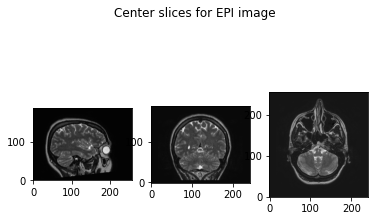

In [ ]:
slice_0 = canonical_img_data_2[80, :, :]
slice_1 = canonical_img_data_2[:, 80, :]
slice_2 = canonical_img_data_2[:, :, 50]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image") 

Text(0.5, 0.98, 'Center slices for EPI image')

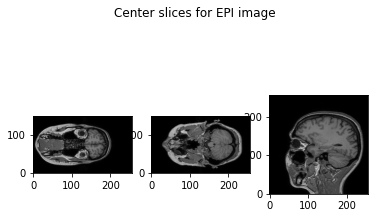

In [ ]:
slice_0 = epi_img_data_1[80, :, :]
slice_1 = epi_img_data_1[:, 80, :]
slice_2 = epi_img_data_1[:, :, 50]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image") 

Text(0.5, 0.98, 'Center slices for EPI image')

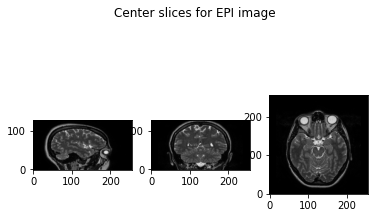

In [ ]:
slice_0 = epi_img_data_2[80, :, :]
slice_1 = epi_img_data_2[:, 80, :]
slice_2 = epi_img_data_2[:, :, 50]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image") 

In [ ]:
ci1_shape = canonical_img_1.header.get_data_shape()
ci2_shape = canonical_img_2.header.get_data_shape()
print(ci1_shape)
print(ci2_shape)
print((max(ci1_shape[0], ci2_shape[0]), max(ci1_shape[1], ci2_shape[1]), max(ci1_shape[2], ci2_shape[2])))

(180, 268, 268)
(241, 257, 188)
(241, 268, 268)


(0, 61, 0, 0, 0, 0)

(0, 0, 0, 11, 0, 80)

torch.Size([180, 268, 329])

torch.Size([321, 268, 188])

In [ ]:
t3d = torch.empty(241, 257, 188)
p3d = (0, 0, 0, 11, 0, 80)
out3d = torch.nn.functional.pad(t3d, p3d, "constant", 0)
print(out3d.size())

torch.Size([321, 268, 188])


In [ ]:
target = torch.zeros(241, 268, 268)
source = torch.ones(241, 257, 188)
target[:source.shape[0], :source.shape[1], :source.shape[2]] = source
print(target.shape)

torch.Size([241, 268, 268])


In [ ]:
print(epi_img_1.header["pixdim"][1:4])

[1. 1. 1.]


In [ ]:
float(epi_img_1.header["qoffset_x"])

-88.639892578125

In [ ]:
def preprocess_nifti_images(resampling_size = [1,1,1]):
   # read from T1 and T2 paths
        orig_nii_t1 = nb.load(t1_fn)
        orig_nii_t2 = nb.load(t2_fn)

        #print(orig_nii_t1.header)
        #print(orig_nii_t2.header)

        print(orig_nii_t1.header["pixdim"])
        print(orig_nii_t2.header["pixdim"])
        print(orig_nii_t1.header["qoffset_x"])
        print(orig_nii_t1.header["qoffset_y"])
        print(orig_nii_t1.header["qoffset_z"])
        print(orig_nii_t2.header["qoffset_x"])
        print(orig_nii_t2.header["qoffset_y"])
        print(orig_nii_t2.header["qoffset_z"])

        orig_nii_t1_voxel_dim = orig_nii_t1.header["pixdim"][1:4]
        orig_nii_t2_voxel_dim = orig_nii_t2.header["pixdim"][1:4]
        orig_nii_t1_centre = [float(orig_nii_t1.header["qoffset_x"]), float(orig_nii_t1.header["qoffset_y"]), float(orig_nii_t1.header["qoffset_z"])]
        orig_nii_t2_centre = [float(orig_nii_t2.header["qoffset_x"]), float(orig_nii_t2.header["qoffset_y"]), float(orig_nii_t2.header["qoffset_z"])]


        print(" ============= ============== ===================")
        print("Image 1 voxel resolution before resampling: {}".format(orig_nii_t1_voxel_dim))
        print(" ============= ============== ===================")
        print("Image 2 voxel resolution before resampling: {}".format(orig_nii_t2_voxel_dim))
        print(" ============= ============== ===================")
        print("Image 1 centre before resampling: {}".format(orig_nii_t1_centre))
        print(" ============= ============== ===================")
        print("Image 2 centre before resampling: {}".format(orig_nii_t2_centre))
        

        print("original t1 affine: {}".format(orig_nii_t1.affine))
        print(" ============= ============== ===================")
        print("original t2 affine: {}".format(orig_nii_t2.affine))
        print(" ============= ============== ===================")
        print("original t1 Orientation: {}".format(nb.aff2axcodes(orig_nii_t1.affine)))
        print(" ============= ============== ===================")
        print("original t2 Orientation: {}".format(nb.aff2axcodes(orig_nii_t2.affine)))

        canonical_img_1 = nb.as_closest_canonical(orig_nii_t1)
        print(" ============= ============== ===================")
        print("orientation changed  t1 affine: {}".format(canonical_img_1.affine))
        print(" ============= ============== ===================")
        print("orientation changed  t1 : {}".format(nb.aff2axcodes(canonical_img_1.affine)))
        print(" ============= ============== ===================")
        canonical_img_2 = nb.as_closest_canonical(orig_nii_t2)
        print(" ============= ============== ===================")
        print("orientation changed  t2 affine: {}".format(canonical_img_2.affine))
        print(" ============= ============== ===================")
        print("orientation changed  t1 : {}".format(nb.aff2axcodes(canonical_img_2.affine)))

        resampled_voxel_size = resampling_size
        canonical_img_1 = nb.processing.resample_to_output(canonical_img_1,voxel_sizes=resampled_voxel_size)
        canonical_img_2 = nb.processing.resample_to_output(canonical_img_2,voxel_sizes=resampled_voxel_size)

        print(" ============= ============== ===================")
        print("Shape of resampled 1 image: {}".format(canonical_img_1.header.get_data_shape()))
        print(" ============= ============== ===================")
        print("resampled t1 affine: {}".format(canonical_img_1.affine))
        print(" ============= ============== ===================")
        print("Shape of resampled 1 image: {}".format(canonical_img_2.header.get_data_shape()))
        print(" ============= ============== ===================")       
        print("resampled 2 affine: {}".format(canonical_img_2.affine))
        print(" ============= ============== ===================")

        ci1_shape = canonical_img_1.header.get_data_shape()
        ci2_shape = canonical_img_2.header.get_data_shape()
        max_shapes = (max(ci1_shape[0], ci2_shape[0]), max(ci1_shape[1], ci2_shape[1]), max(ci1_shape[2], ci2_shape[2]))
        max_shapes_array = [max(ci1_shape[0], ci2_shape[0]), max(ci1_shape[1], ci2_shape[1]), max(ci1_shape[2], ci2_shape[2])]
        
        canonical_img_1_voxel_dim = canonical_img_1.header["pixdim"][1:4]
        canonical_img_2_voxel_dim = canonical_img_1.header["pixdim"][1:4]
        canonical_img_1_centre = [float(canonical_img_1.header["qoffset_x"]), float(canonical_img_1.header["qoffset_y"]), float(canonical_img_1.header["qoffset_z"])]
        canonical_img_2_centre = [float(canonical_img_2.header["qoffset_x"]), float(canonical_img_2.header["qoffset_y"]), float(canonical_img_2.header["qoffset_z"])]

        print(" ============= ============== ===================")
        print("Image 1 voxel resolution after resampling: {}".format(canonical_img_1_voxel_dim))
        print(" ============= ============== ===================")
        print("Image 2 voxel resolution after resampling: {}".format(canonical_img_2_voxel_dim))
        print(" ============= ============== ===================")
        print("Image 1 centre after resampling: {}".format(canonical_img_1_centre))
        print(" ============= ============== ===================")
        print("Image 2 centre after resampling: {}".format(canonical_img_2_centre))
               
        t1_img_np = np.array(canonical_img_1.dataobj)
        t2_img_np = np.array(canonical_img_2.dataobj)

        t1_img_tnsr = torch.from_numpy(t1_img_np)        
        t2_img_tnsr = torch.from_numpy(t2_img_np)  
        
        #t1_last_dim = t1_img_tnsr.shape[2]
        #t2_last_dim = t2_img_tnsr.shape[2]
        #print((0, max_shapes[0]-ci1_shape[0], 0, max_shapes[1]-ci1_shape[1], 0, max_shapes[2]-ci1_shape[2]))
        #print((0, max_shapes[0]-ci2_shape[0], 0, max_shapes[1]-ci2_shape[1], 0, max_shapes[2]-ci2_shape[2]))

        #t1_img_tnsr = torch.nn.functional.pad(t1_img_tnsr, (0, max_shapes[0]-ci1_shape[0], 0, max_shapes[1]-ci1_shape[1], 0, max_shapes[2]-ci1_shape[2]),mode="constant")
        #t2_img_tnsr = torch.nn.functional.pad(t2_img_tnsr, (0, max_shapes[0]-ci2_shape[0], 0, max_shapes[1]-ci2_shape[1], 0, max_shapes[2]-ci2_shape[2]),mode="constant")

        padded_t1_img_tnsr = torch.zeros(max_shapes[0], max_shapes[1], max_shapes[2])
        padded_t2_img_tnsr = torch.zeros(max_shapes[0], max_shapes[1], max_shapes[2])

        padded_t1_img_tnsr[:t1_img_tnsr.shape[0], :t1_img_tnsr.shape[1], :t1_img_tnsr.shape[2]] = t1_img_tnsr
        padded_t2_img_tnsr[:t2_img_tnsr.shape[0], :t2_img_tnsr.shape[1], :t2_img_tnsr.shape[2]] = t2_img_tnsr

        padded_t1_img_tnsr = padded_t1_img_tnsr.type(torch.FloatTensor)
        padded_t2_img_tnsr = padded_t2_img_tnsr.type(torch.FloatTensor)

        print(padded_t1_img_tnsr.shape)
        print(padded_t2_img_tnsr.shape)

        print(padded_t1_img_tnsr.type())
        print(padded_t2_img_tnsr.type())

        #print(padded_t1_img_tnsr.header)
        #print(padded_t1_img_tnsr.header)

        return padded_t1_img_tnsr, padded_t2_img_tnsr, canonical_img_1_voxel_dim, canonical_img_2_voxel_dim, canonical_img_1_centre, canonical_img_2_centre, max_shapes_array;


In [ ]:
preprocessed_t1_img_tnsr, preprocessed_t2_img_tnsr, canonical_img_1_voxel_dim, canonical_img_2_voxel_dim, canonical_img_1_centre, canonical_img_2_centre, img_shape = preprocess_nifti_images();

[-1.        0.9375    0.9375    1.199997  0.        0.        0.
  0.      ]
[-1.      0.9375  0.9375  1.25    0.      0.      0.      0.    ]
-88.63989
116.532005
-112.113556
120.75988
-104.171005
-60.2865
 ============= ============== ===================
Image 1 voxel resolution before resampling: [0.9375   0.9375   1.199997]
 ============= ============== ===================
Image 2 voxel resolution before resampling: [0.9375 0.9375 1.25  ]
 ============= ============== ===================
Image 1 centre before resampling: [-88.639892578125, 116.5320053100586, -112.11355590820312]
 ============= ============== ===================
Image 2 centre before resampling: [120.75988006591797, -104.17100524902344, -60.2864990234375]
original t1 affine: [[ 0.00000000e+00  0.00000000e+00  1.19999695e+00 -8.86398926e+01]
 [-9.30352330e-01  1.15545668e-01  0.00000000e+00  1.16532005e+02]
 [ 1.15545668e-01  9.30352330e-01 -2.49799545e-16 -1.12113556e+02]
 [ 0.00000000e+00  0.00000000e+00  0.0000000

In [ ]:
def three_dim_affine_reg(t1_img_tnsr=t1_img_tnsr, t2_img_tnsr=t2_img_tnsr, t1_img_voxel_size = canonical_img_1_voxel_dim, t2_img_voxel_size = canonical_img_2_voxel_dim, 
                         t1_img_centre = canonical_img_1_centre, t2_img_centre = canonical_img_2_centre, img_shape = img_shape, loss_fnc = "MSE", mode = "normal"):
    start = time.time()

    # set the used data type
    dtype = torch.float32
    # set the device for the computaion to CPU
    #device = torch.device("cpu")
    device = torch.device("cuda:0")

    # In order to use a GPU uncomment the following line. The number is the device index of the used GPU
    # Here, the GPU with the index 0 is used.
    # device = th.device("cuda:0")

    # create 3D image volume with two objects
    object_shift = 50
    scaler = 2

    if(mode == "normal"):
      fixed_image = torch.zeros(256, 256, 256).to(device=device)
      fixed_image[16:128, 16:128, 16:128] = 1.0
      fixed_image = al.Image(fixed_image, [256, 256, 256], [1,1,1], [0,0,0])
      
      moving_image = torch.zeros(256, 256, 256).to(device=device)
      moving_image[(16+object_shift):(64+object_shift) * scaler, (16+object_shift):(64+object_shift) * scaler, (16+object_shift):(64+object_shift) * scaler] = 1.0  
      moving_image = al.Image(moving_image, [256, 256, 256], [1,1,1], [0,0,0])
      
    
    else:
      new_t1_img_tnsr = t1_img_tnsr.to(device=device)
      new_t2_img_tnsr = t2_img_tnsr.to(device=device)
      fixed_image = al.Image(new_t1_img_tnsr, img_shape, canonical_img_1_voxel_dim, canonical_img_1_centre)
      moving_image = al.Image(new_t2_img_tnsr, img_shape, canonical_img_2_voxel_dim, canonical_img_2_centre)
      

    # printing image properties
    print(fixed_image.size)
    print(fixed_image.spacing)
    print(fixed_image.origin)
    print(fixed_image.dtype)

    print(moving_image.size)
    print(moving_image.spacing)
    print(moving_image.origin)
    print(moving_image.dtype)

    # create pairwise registration object
    registration = al.PairwiseRegistration()

    # choose the affine transformation model
    print("Using Affine transformation")
    transformation = al.transformation.pairwise.AffineTransformation(moving_image, opt_cm=True)
    transformation.init_translation(fixed_image)
    registration.set_transformation(transformation)

    
    # choose the Mean Squared Error as image loss
    if(loss_fnc == "MSE"):
      print("Using Mean squared error loss")
      image_loss = al.loss.pairwise.MSE(fixed_image, moving_image)
    elif(loss_fnc == "MI"):
      print("Using Mutual information loss")
      image_loss = al.loss.pairwise.MI(fixed_image, moving_image,bins=20, sigma=3)
    elif(loss_fnc == "CC"):
      print("Using Cross corelation loss")
      image_loss = al.loss.pairwise.NCC(fixed_image, moving_image)
    else:
      print("No valid option chosen among MSE/NCC/NMI, using MSE as default")
      image_loss = al.loss.pairwise.MSE(fixed_image, moving_image)
    #image_loss = al.loss.pairwise.MSE(fixed_image, moving_image)

    registration.set_image_loss([image_loss])

    # choose the Adam optimizer to minimize the objective
    optimizer = torch.optim.Adam(transformation.parameters(), lr=0.1)

    registration.set_optimizer(optimizer)
    registration.set_number_of_iterations(13)

    # start the registration
    registration.start()

    # set the intensities for the visualisation
    fixed_image.image = 1 - fixed_image.image
    moving_image.image = 1 - moving_image.image

    # warp the moving image with the final transformation result
    displacement = transformation.get_displacement()
    warped_image = al.transformation.utils.warp_image(moving_image, displacement)

    end = time.time()

    print("=================================================================")

    print("Registration done in: ", end - start, " s")
    print("Result parameters:")
    transformation.print()
    

    # sitk.WriteImage(warped_image.itk(), '/tmp/rigid_warped_image.vtk')
    # sitk.WriteImage(moving_image.itk(), '/tmp/rigid_moving_image.vtk')
    # sitk.WriteImage(fixed_image.itk(), '/tmp/rigid_fixed_image.vtk')

    # plot the results
    plt.subplot(131)
    plt.imshow(fixed_image.numpy()[90, :, :], cmap='gray')
    plt.title('Fixed Image Slice')

    plt.subplot(132)
    plt.imshow(moving_image.numpy()[90, :, :], cmap='gray')
    plt.title('Moving Image Slice')
    

    plt.subplot(133)
    plt.imshow(warped_image.numpy()[16, :, :], cmap='gray')
    plt.title('Warped Moving Image Slice')
    
    
    plt.show()

    return warped_image, transformation, displacement;

In [ ]:
if __name__ == '__three_dim_affine_reg__':
    three_dim_affine_reg()

[241, 268, 268]
[1. 1. 1.]
[-88.639892578125, -120.70783996582031, -112.11355590820312]
torch.float32
[241, 268, 268]
[1. 1. 1.]
[-118.30261993408203, -122.06185150146484, -60.2864990234375]
torch.float32
Using Affine transformation
Using Mutual information loss
0 mi: -0.8756117820739746 
1 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


mi: -0.2864415645599365 
2 mi: -0.16720366477966309 
3 mi: -0.11383795738220215 
4 mi: 0.002777099609375 
5 mi: 0.06490802764892578 
6 mi: 0.10449767112731934 
7 mi: 0.15874767303466797 
8 mi: 0.180877685546875 
9 mi: 0.1837158203125 
10 mi: 0.18088436126708984 
11 mi: 0.16724324226379395 
12 mi: 0.13342499732971191 
Registration done in:  2.7409493923187256  s
Result parameters:
_phi_z -0.4761032462120056
_t_x -0.29521703720092773
_t_y 0.5335150361061096
_center_mass_x -0.7409692406654358
_center_mass_y -0.5216091275215149
_t_z -0.09840356558561325
_phi_x 0.4729735255241394
_phi_y -0.5731992125511169
_center_mass_z -0.28196442127227783
_scale_x 0.9219437837600708
_scale_y 1.127555251121521
_scale_z 1.6304521560668945
_shear_y_x 0.3236090838909149
_shear_x_y -0.2296135127544403
_shear_z_x 0.008924001827836037
_shear_z_y 0.46497052907943726
_shear_x_z 0.6451525688171387
_shear_y_z 0.35177817940711975


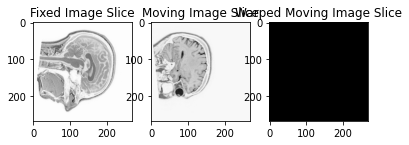

In [ ]:
warped_img_tnsr, transformation, displacement = three_dim_affine_reg(t1_img_tnsr=preprocessed_t1_img_tnsr, t2_img_tnsr=preprocessed_t2_img_tnsr,loss_fnc="MI",mode="mri")

In [ ]:
transformation.transformation_matrix

tensor([[ 0.5740,  0.1503, -0.0895, -0.1644],
        [-0.0576,  0.9173, -0.2697, -0.1278],
        [-0.0032,  0.2415,  0.8917,  0.2737]], device='cuda:0',
       grad_fn=<SliceBackward>)

In [ ]:
transformation.get_displacement_numpy().shape

(241, 268, 268, 3)

In [ ]:
transformation.transformation_matrix

tensor([[ 0.5740,  0.1503, -0.0895, -0.1644],
        [-0.0576,  0.9173, -0.2697, -0.1278],
        [-0.0032,  0.2415,  0.8917,  0.2737]], device='cuda:0',
       grad_fn=<SliceBackward>)

In [ ]:
for name,param in transformation.named_parameters():
  print(name)

_phi_z
_t_x
_t_y
_center_mass_x
_center_mass_y
_t_z
_phi_x
_phi_y
_center_mass_z
_scale_x
_scale_y
_scale_z
_shear_y_x
_shear_x_y
_shear_z_x
_shear_z_y
_shear_x_z
_shear_y_z


In [ ]:
warped_img_np = warped_img_tnsr.numpy();
affine_transformation_matrix_np = transformation.transformation_matrix.detach().cpu().numpy()

In [ ]:
affine_transformation_matrix_np

array([[ 0.57398915,  0.15030651, -0.08946014, -0.16440997],
       [-0.05756484,  0.9172556 , -0.2696694 , -0.12782359],
       [-0.00316409,  0.2414628 ,  0.8916763 ,  0.27371845]],
      dtype=float32)

In [ ]:
final_transformation_matrix = np.identity(4)
final_transformation_matrix

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
affine_transformation_matrix_np[0:1 , :]
final_transformation_matrix[0:3, :] = affine_transformation_matrix_np[: , :]

In [ ]:
final_transformation_matrix

array([[ 0.57398915,  0.15030651, -0.08946014, -0.16440997],
       [-0.05756484,  0.91725558, -0.26966941, -0.12782359],
       [-0.00316409,  0.2414628 ,  0.89167631,  0.27371845],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [ ]:
warped_nifti_img = nb.Nifti1Image(warped_img_np, affine=final_transformation_matrix)

In [ ]:
warped_nifti_img.to_filename("/content/drive/My Drive/Colab Notebooks/image_registration/warped_image.nii.gz")

[256, 256, 256]
[1, 1, 1]
[0, 0, 0]
torch.float32
[256, 256, 256]
[1, 1, 1]
[0, 0, 0]
torch.float32
0 mse: 0.3596647083759308 
1 mse: 0.2433621883392334 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "



2 mse: 0.363253653049469 
3 mse: 0.3949555456638336 
4 mse: 0.3331059217453003 
5 mse: 0.25572237372398376 
6 mse: 0.2260735183954239 
7 mse: 0.22686631977558136 
8 mse: 0.2196093648672104 
9 mse: 0.1954527497291565 
10 mse: 0.19159448146820068 
11 mse: 0.19286483526229858 
12 mse: 0.19372448325157166 
13 mse: 0.195272758603096 
14 mse: 0.1989305168390274 
15 mse: 0.1928086131811142 
16 mse: 0.16488471627235413 
17 mse: 0.1493309736251831 
18 mse: 0.13436618447303772 
19 mse: 0.13783377408981323 
20 mse: 0.10316867381334305 
21 mse: 0.09241365641355515 
22 mse: 0.0968349501490593 
23 mse: 0.093501515686512 
24 mse: 0.08968751132488251 
25 mse: 0.08818785101175308 
26 mse: 0.07389616966247559 
27 mse: 0.07786454260349274 
28 mse: 0.05409301444888115 
29 mse: 0.07125260680913925 
30 mse: 0.06864148378372192 
31 mse: 0.08503236621618271 
32 mse: 0.07816535979509354 
33 mse: 0.05714559555053711 
34 mse: 0.08319734036922455 
35 mse: 0.06502188742160797 
36 mse: 0.06362571567296982 
37 mse:

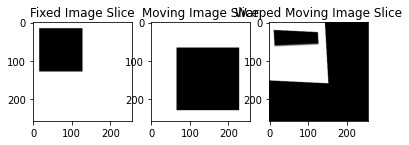

In [ ]:
three_dim_affine_reg(mode="normal")

In [ ]:
def three_dim_affine_reg_chng(t1_img_tnsr=t1_img_tnsr, t2_img_tnsr=t2_img_tnsr):
    start = time.time()

    # set the used data type
    dtype = torch.float32
    # set the device for the computaion to CPU
    #device = torch.device("cpu")
    device = torch.device("cuda:0")

    # In order to use a GPU uncomment the following line. The number is the device index of the used GPU
    # Here, the GPU with the index 0 is used.
    # device = th.device("cuda:0")

    # create 3D image volume with two objects
    object_shift = 10

    fixed_image = torch.zeros(256, 256, 256).to(device=device)
    fixed_image[16:64, 16:64, 16:64] = 1.0
    print(fixed_image.shape)
    #, [1, 1, 1], [0, 0, 0]
    fixed_image = al.Image(t1_img_tnsr, [256, 256, 256], [2,2,2], [0,0,0])
    #fixed_image = t1_img_tnsr

    moving_image = torch.zeros(256, 256, 256).to(device=device)
    moving_image[16 - object_shift:64 - object_shift, 16 - object_shift:64 - object_shift, 16 - object_shift:64 - object_shift] = 1.0
    #, [1, 1, 1], [0, 0, 0]
    print(moving_image.shape)
    print(moving_image.type)
    moving_image = al.Image(t2_img_tnsr, [256, 256, 256], [2,2,2], [0,0,0])
    #moving_image = t2_img_tnsr

    # create pairwise registration object
    registration = al.PairwiseRegistration()

    # choose the affine transformation model
    transformation = al.transformation.pairwise.AffineTransformation(moving_image, opt_cm=True)
    transformation.init_translation(fixed_image)

    registration.set_transformation(transformation)

    
    # choose the Mean Squared Error as image loss
    #image_loss = al.loss.pairwise.MSE(fixed_image, moving_image)
    image_loss = al.loss.pairwise.MSE(fixed_image, moving_image)

    registration.set_image_loss([image_loss])

    # choose the Adam optimizer to minimize the objective
    optimizer = torch.optim.Adam(transformation.parameters(), lr=0.1)

    registration.set_optimizer(optimizer)
    registration.set_number_of_iterations(10)

    # start the registration
    registration.start()

    # set the intensities for the visualisation
    fixed_image.image = 1 - fixed_image.image
    moving_image.image = 1 - moving_image.image

    # warp the moving image with the final transformation result
    displacement = transformation.get_displacement()
    warped_image = al.transformation.utils.warp_image(moving_image, displacement)

    end = time.time()

    print("=================================================================")

    print("Registration done in: ", end - start, " s")
    print("Result parameters:")
    transformation.print()

    # sitk.WriteImage(warped_image.itk(), '/tmp/rigid_warped_image.vtk')
    # sitk.WriteImage(moving_image.itk(), '/tmp/rigid_moving_image.vtk')
    # sitk.WriteImage(fixed_image.itk(), '/tmp/rigid_fixed_image.vtk')

    # plot the results
    plt.subplot(131)
    plt.imshow(fixed_image.numpy()[16, :, :], cmap='gray')
    plt.title('Fixed Image Slice')

    plt.subplot(132)
    plt.imshow(moving_image.numpy()[16, :, :], cmap='gray')
    plt.title('Moving Image Slice')

    plt.subplot(133)
    plt.imshow(warped_image.numpy()[16, :, :], cmap='gray')
    plt.title('Warped Moving Image Slice')

    plt.show()

In [ ]:
three_dim_affine_reg_chng()

torch.Size([256, 256, 256])
torch.Size([256, 256, 256])
<built-in method type of Tensor object at 0x7f38b8e05d80>


RuntimeError: ignored

def resample_image_to_target(image, target, interp_type='linear', imagetype=0, verbose=False, **kwargs):
    """
    Resample image by using another image as target reference. 
    This function uses ants.apply_transform with an identity matrix 
    to achieve proper resampling.
    
    ANTsR function: `resampleImageToTarget`

    Arguments
    ---------
    image : ANTsImage
        image to resample
    
    target : ANTsImage
        image of reference, the output will be in this space
    
    interp_type : string
        Choice of interpolator. Supports partial matching.
            linear
            nearestNeighbor
            multiLabel for label images but genericlabel is preferred
            gaussian
            bSpline
            cosineWindowedSinc
            welchWindowedSinc
            hammingWindowedSinc
            lanczosWindowedSinc
            genericLabel use this for label images
    
    imagetype : integer 
        choose 0/1/2/3 mapping to scalar/vector/tensor/time-series
    
    verbose : boolean
        print command and run verbose application of transform.
    
    kwargs : keyword arguments
        additional arugment passed to antsApplyTransforms C code
    
    Returns
    -------
    ANTsImage

ANTsImage (AIL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 150)
	 Spacing    : (0.9375, 0.9375, 1.2)
	 Origin     : (88.6399, -116.532, -112.1136)
	 Direction  : [-0.     -0.     -1.      0.9924 -0.1232 -0.      0.1232  0.9924 -0.    ]

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 130)
	 Spacing    : (0.9375, 0.9375, 1.25)
	 Origin     : (-120.7599, 104.171, -60.2865)
	 Direction  : [ 1.      0.     -0.      0.     -0.9938  0.111  -0.      0.111   0.9938]

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 130)
	 Spacing    : (0.9375, 0.9375, 1.25)
	 Origin     : (-120.7599, 104.171, -60.2865)
	 Direction  : [ 1.      0.     -0.      0.     -0.9938  0.111  -0.      0.111   0.9938]



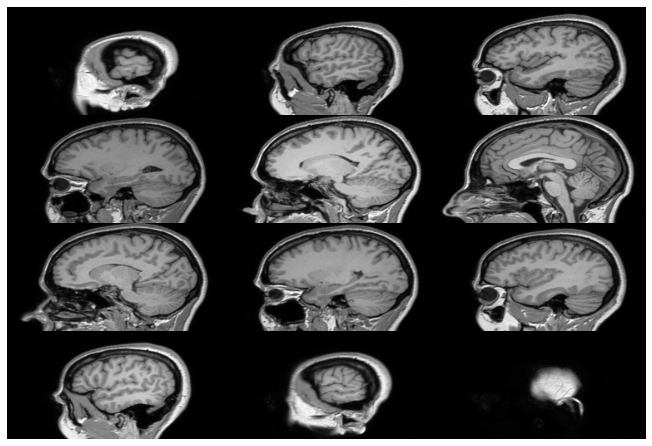

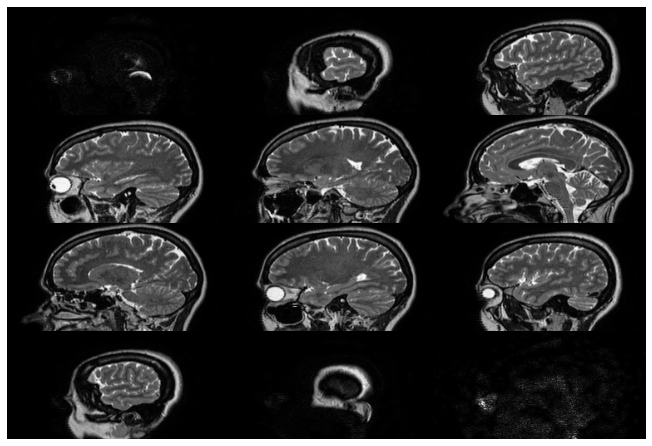

In [ ]:
# A path to a T1-weighted brain .nii image:
t1_fn = '/content/drive/My Drive/Colab Notebooks/ImageRegistrationUsingDeepLearning/IXI-T1/IXI002-Guys-0828-T1.nii.gz'
t2_fn = '/content/drive/My Drive/Colab Notebooks/ImageRegistrationUsingDeepLearning/IXI-T2/IXI002-Guys-0828-T2.nii.gz'
img1 = ants.image_read(t1_fn)
img2 = ants.image_read(t2_fn)
img_resampled = ants.resample_image_to_target(img1,img2)
print(img1)
print(img2)
print(img_resampled)
image_n4 = ants.n4_bias_field_correction(img_resampled)
ants.plot(image_n4)
ants.plot(img2)

ants.registration(fixed, moving, type_of_transform='SyN', initial_transform=None, outprefix='', mask=None, grad_step=0.2, flow_sigma=3, total_sigma=0, aff_metric='mattes', aff_sampling=32, syn_metric='mattes', syn_sampling=32, reg_iterations=(40, 20, 0), verbose=False, **kwargs)[source]
Register a pair of images either through the full or simplified interface to the ANTs registration method.

ANTsR function: antsRegistration

Parameters:	
fixed (ANTsImage) – fixed image to which we register the moving image.
moving (ANTsImage) – moving image to be mapped to fixed space.
type_of_transform (string) – A linear or non-linear registration type. Mutual information metric by default. See Notes below for more.
initial_transform (list of strings (optional)) – transforms to prepend
outprefix (string) – output will be named with this prefix.
mask (ANTsImage (optional)) – mask the registration.
grad_step (scalar) – gradient step size (not for all tx)
flow_sigma (scalar) – smoothing for update field
total_sigma (scalar) – smoothing for total field
aff_metric (string) – the metric for the affine part (GC, mattes, meansquares)
aff_sampling (scalar) – the nbins or radius parameter for the syn metric
syn_metric (string) – the metric for the syn part (CC, mattes, meansquares, demons)
syn_sampling (scalar) – the nbins or radius parameter for the syn metric
reg_iterations (list/tuple of python:integers) – vector of iterations for syn. we will set the smoothing and multi-resolution parameters based on the length of this vector.
verbose (boolean) – request verbose output (useful for debugging)
kwargs (keyword args) – extra arguments
Returns:	
warpedmovout: Moving image warped to space of fixed image. warpedfixout: Fixed image warped to space of moving image. fwdtransforms: Transforms to move from moving to fixed image. invtransforms: Transforms to move from fixed to moving image.

Return type:	
dict containing follow key/value pairs

Notes

typeofTransform can be one of:
“Translation”: Translation transformation.
“Rigid”: Rigid transformation: Only rotation and translation.
“Similarity”: Similarity transformation: scaling, rotation and translation.
“QuickRigid”: Rigid transformation: Only rotation and translation.
May be useful for quick visualization fixes.’
“DenseRigid”: Rigid transformation: Only rotation and translation.
Employs dense sampling during metric estimation.’
“BOLDRigid”: Rigid transformation: Parameters typical for BOLD to
BOLD intrasubject registration’.’
“Affine”: Affine transformation: Rigid + scaling.
“AffineFast”: Fast version of Affine.
“BOLDAffine”: Affine transformation: Parameters typical for BOLD to
BOLD intrasubject registration’.’
“TRSAA”: translation, rigid, similarity, affine (twice). please set
regIterations if using this option. this would be used in cases where you want a really high quality affine mapping (perhaps with mask).
“ElasticSyN”: Symmetric normalization: Affine + deformable
transformation, with mutual information as optimization metric and elastic regularization.
“SyN”: Symmetric normalization: Affine + deformable transformation,
with mutual information as optimization metric.
“SyNRA”: Symmetric normalization: Rigid + Affine + deformable
transformation, with mutual information as optimization metric.
“SyNOnly”: Symmetric normalization: no initial transformation,
with mutual information as optimization metric. Assumes images are aligned by an inital transformation. Can be useful if you want to run an unmasked affine followed by masked deformable registration.
“SyNCC”: SyN, but with cross-correlation as the metric.
“SyNabp”: SyN optimized for abpBrainExtraction.
“SyNBold”: SyN, but optimized for registrations between BOLD and T1 images.
“SyNBoldAff”: SyN, but optimized for registrations between BOLD
and T1 images, with additional affine step.
“SyNAggro”: SyN, but with more aggressive registration
(fine-scale matching and more deformation). Takes more time than SyN.
“TVMSQ”: time-varying diffeomorphism with mean square metric
“TVMSQC”: time-varying diffeomorphism with mean square metric for very large deformation

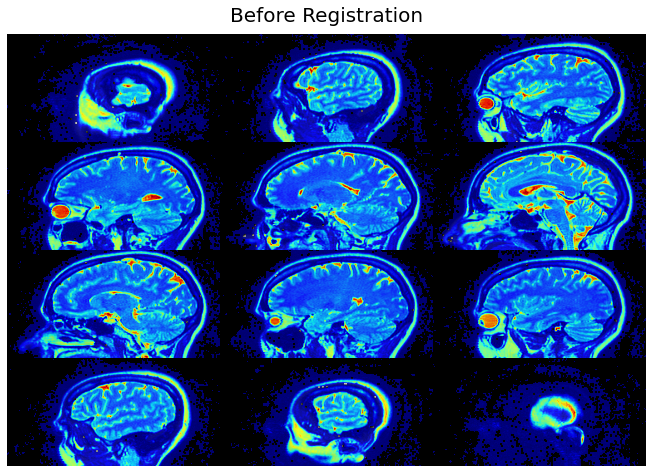

{'warpedmovout': ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 130)
	 Spacing    : (0.9375, 0.9375, 1.25)
	 Origin     : (-120.7599, 104.171, -60.2865)
	 Direction  : [ 1.      0.     -0.      0.     -0.9938  0.111  -0.      0.111   0.9938]
, 'warpedfixout': ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 130)
	 Spacing    : (0.9375, 0.9375, 1.25)
	 Origin     : (-120.7599, 104.171, -60.2865)
	 Direction  : [ 1.      0.     -0.      0.     -0.9938  0.111  -0.      0.111   0.9938]
, 'fwdtransforms': ['/tmp/tmp5thsupgb1Warp.nii.gz', '/tmp/tmp5thsupgb0GenericAffine.mat'], 'invtransforms': ['/tmp/tmp5thsupgb0GenericAffine.mat', '/tmp/tmp5thsupgb1InverseWarp.nii.gz']}


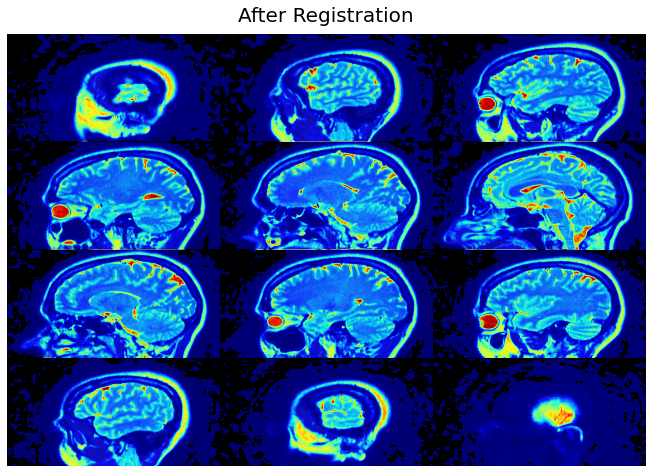

In [ ]:
img_resampled.plot(overlay=img2, title='Before Registration')
mytx = ants.registration(fixed=img_resampled , moving=img2, type_of_transform='SyN' )
print(mytx)
warped_moving = mytx['warpedmovout']
img_resampled.plot(overlay=warped_moving,
           title='After Registration')